In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Statistical Estimators and Importance Sampling

## Introduction

This notebook explores advanced statistical estimation techniques, focusing on importance sampling and convergence analysis.

## Theoretical Background

### Importance Sampling Estimator

The general form of the importance sampling estimator is:

$$\hat{S}_f = \frac{1}{n} \sum_{i=1}^{n} \exp\left(-\frac{\theta^{(i)}}{\theta}\right) \left[1 + \frac{(n^{(i)})^{0,\theta} - n^{(i)}}{\theta}\right]^{2}$$

### Riemann Approximation

The Riemann approximation of the estimator can be expressed as:

$$\hat{S}_f = \frac{\sum_{i=1}^{r} (n_{(i+1)} - n_{(i)}) e^{-n^{(i)}/\theta} \prod_{j=1}^{r} [1 + (x_j - n_{(i)})^{r}]}{\sum_{i=1}^{r} (n_{(i+1)} - n_{(i)}) \prod_{j=1}^{r} [1 + (x_j - n_{(i)})^{r}]}$$

## Convergence Analysis

### Key Observations

1. The method does not always apply (parametric Rao-Blackwellization and Riemann approximation are not always available)
2. It is intrinsically conservative (the speed of convergence is determined by the slowest estimate)
3. Cannot detect missing modes, except when the Riemann approximation can be implemented
4. In some cases, Rao-Blackwellization cannot be distinguished from the standard average and limit importance sampling

## Graphical Convergence

The convergence graphs demonstrate the behavior of different estimators:

- Solid line: Theoretical control
- Dotted line: Empirical estimates
- Graphs show stabilization after a certain number of iterations

### Convergence Characteristics

- Initial rapid fluctuations
- Gradual stabilization towards a consistent estimate
- Variations in convergence speed depending on the estimator

## Renewal Theory

The renewal theory provides insights into small set ergodic Markov chains:

### Transition Kernel Modification

The transition kernel $K$ is modified with a probability:

$$K^{(n+1)} = \begin{cases} 
\sim K^{(n)}(\cdot) & \text{with probability } \epsilon \\
\sim \text{Kernel associated with the transition} & \text{with probability } (1-\epsilon)
\end{cases}$$

## Code Example

```python
def importance_sampling_estimator(data, theta):
    """
    Calculate importance sampling estimator
    
    Parameters:
    - data: Sample observations
    - theta: Parameter controlling the estimation
    
    Returns:
    - Estimated statistic
    """
    # Implementation based on theoretical formulation
    pass
```

## Conclusion

Importance sampling and related estimation techniques provide powerful tools for statistical inference, especially in complex probabilistic models.

## References

1. Theoretical papers on importance sampling
2. Renewal theory in Markov chain Monte Carlo methods

# Advanced Statistical Estimation Techniques

## Importance Sampling Estimator

The conditional version of the empirical mean is defined as:

$$\hat{S}_f = \frac{1}{r} \sum \exp\left(-\mu^{(n_i,n_i^{0},n_i^{1})}\right) + r^{2}\left(\mu^{(n_i,n_i^{0},n_i^{1})}\right)^{2}/2$$

### Detailed Weights Calculation

The importance sampling weights are calculated using:
# Mathematical Expression Rewrite

## Original Expression

$$
\exp\left\{ \frac{(n^{(i)})^n}{\sigma^2} + \frac{\left(n^{(i)} - \mu^{(n_i, n_i^{0}, n_i^{1})}\right)^2}{2\sigma^2} \right\} 
\prod_{i=1}^{r} \left[ 1 + (x_i - n^{(i)})^r \right]
$$


## Proposed Rewrite

### Decomposed Form

$$
\exp\left\{\frac{(n^{(i)})^{(n)}}{\sigma^{2}}\right\} \cdot 
\exp\left\{-\frac{\left(n^{(i)} - \mu^{(n_i,n_i^{0},n_i^{1})}\right)^{2}}{2\sigma^{2}}\right\} \cdot 
\prod_{i=1}^{r} \left[1 + (x_i - n^{(i)})^{r}\right]
$$

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)



### Alternative Representation

$$\gamma(n^{(i)}) \cdot \beta(n^{(i)}, \mu) \cdot \delta(x_i, n^{(i)})$$

Where:
- $\gamma(n^{(i)}) = \exp\left\{\frac{(n^{(i)})^{(n)}}{\sigma^{2}}\right\}$ (Normalization term)
- $
\beta(n^{(i)}, \mu) = \exp\left\{-\frac{\left(n^{(i)} - \mu^{(n_i,n_i^{0},n_i^{1})}\right)^{2}}{2\sigma^{2}}\right\}
$
 (Gaussian penalty)
- $\delta(x_i, n^{(i)}) = \prod_{i=1}^{r} [1 + (x_i - n^{(i)})^{r}]$ (Deviation factor)

## Computational Insights

The rewrite offers several advantages:
1. Separates different components of the original expression
2. Allows for more modular computation
3. Provides clearer interpretation of each term's contribution

### Potential Implementation

```python
def compute_weight(n, mu, sigma, x, r):
    """
    Compute the composite weight based on the decomposed expression
    
    Parameters:
    - n: Current state
    - mu: Mean estimate
    - sigma: Scale parameter
    - x: Observed values
    - r: Approximation order
    
    Returns:
    - Composite weight
    """
    # Normalization term
    gamma = np.exp((n**n) / (sigma**2))
    
    # Gaussian penalty
    beta = np.exp(-((n - mu)**2) / (2 * sigma**2))
    
    # Deviation factor
    delta = np.prod([1 + (xi - n)**r for xi in x])
    
    return gamma * beta * delta
```

## Mathematical Interpretation

The rewritten form emphasizes three key components:
1. A normalization term scaling with the state
2. A Gaussian penalty measuring deviation from the mean
3. A deviation factor capturing the relationship with observed values

## Riemann Approximation

The Riemann approximation of the estimator is given by:

$$\hat{S}_f = \frac{\sum_{i=1}^{r} (n_{(i+1)} - n_{(i)}) e^{-n^{(i)\sigma^{-1}}} \prod_{j=1}^{3} [1 + (x_j - n_{(i)})^{r}]}{\sum_{i=1}^{r} (n_{(i+1)} - n_{(i)}) e^{-n^{(i)}/\sigma} \prod_{j=1}^{3} [1 + (x_j - n_{(i)})^{r}]}$$

Where $n_{(i)}$ denotes the ordered sample of the $n^{(i)}$.

## Example: Conditional Probability Chain

For the chain $X^{(10)}$ producing $P(12,11)$ when $h(x) = 4^{-x}$:

$$\begin{aligned}
\mathbb{E}\left[4^{-(X^{(n+1)})}\bigg| X^{(n)} = x\right] &= (1-x^{-1})4^{-x} + x^{-1}4^{-(x-1)} \\
&= (1-x^{-1})4^{-x} + \frac{x^{-1}}{4} \\
&= (1-2^{-n})4^{-x} + 2^{-(n+2)}
\end{aligned}$$

## Key Insights

1. The method provides a conditional estimation technique
2. Utilizes complex weight calculations incorporating multiple parameters
3. Offers approximation through Riemann-style summation
4. Demonstrates intricate probabilistic modeling approaches

## Computational Considerations

- Requires careful handling of nested exponential terms
- Sensitive to parameter selection
- Provides a sophisticated approach to estimating conditional expectations

## Python Sketch for Implementation

```python
def importance_sampling_estimator(samples, sigma):
    """
    Compute importance sampling estimator
    
    Parameters:
    - samples: Ordered sample array
    - sigma: Scaling parameter
    
    Returns:
    - Estimated statistic
    """
    # Placeholder for complex weight calculation
    pass
```

## Mathematical Notation Key

- $n^{(i)}$: Sample values
- $\sigma$: Scaling/variance parameter
- $r$: Approximation order
- $\mu$: Mean estimation

# Statistical Convergence and Estimator Analysis

## Convergence Visualization

The convergence graphs demonstrate multiple estimators:

### Graph Characteristics
- X-axis: Iteration count
- Y-axis: Estimator value
- Different lines representing various estimation techniques

## Key Observations

### Convergence Properties

1. **Method Limitations**
   - Not universally applicable
   - Parametric Rao-Blackwellization may not always be available

2. **Convergence Characteristics**
   $$\text{Convergence Speed} = f(\text{slowest estimate})$$

3. **Estimation Challenges**
   - Cannot detect missing modes
   - Riemann approximation implementation dependent

## Renewal Theory Foundations

### Theoretical Framework

Renewal theory provides insights into small set ergodic Markov chains:

$$P^{(n+1)}(x) = \epsilon \cdot B(x) + (1-\epsilon) \cdot K^{(n)}(x)$$

Where:
- $\epsilon$: Probability of kernel modification
- $B(x)$: Base distribution
- $K^{(n)}(x)$: Transition kernel at iteration $n$

### Transition Kernel Modification

The kernel evolution follows a stochastic process:

$$K^{(n+1)} = \begin{cases} 
\sim K^{(n)}(\cdot) & \text{with probability } \epsilon \\
\sim \text{Associated Transition Kernel} & \text{with probability } (1-\epsilon)
\end{cases}$$
![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

## Practical Implications

1. Small set ergodic Markov chains
2. Restricted theoretical control
3. Probabilistic kernel modifications

## Computational Approach

```python
def renewal_kernel_update(current_kernel, epsilon, base_distribution):
    """
    Update Markov chain transition kernel
    
    Parameters:
    - current_kernel: Current transition kernel
    - epsilon: Modification probability
    - base_distribution: Base probability measure
    
    Returns:
    - Updated kernel
    """
    if np.random.random() < epsilon:
        return base_distribution
    return current_kernel
```

## Mathematical Notation

- $\epsilon$: Modification probability
- $K^{(n)}$: Transition kernel
- $B(x)$: Base distribution
- $P^{(n+1)}(x)$: Probability measure at next iteration

## Conclusion

Renewal theory offers a sophisticated approach to understanding stochastic kernel modifications in statistical estimation.

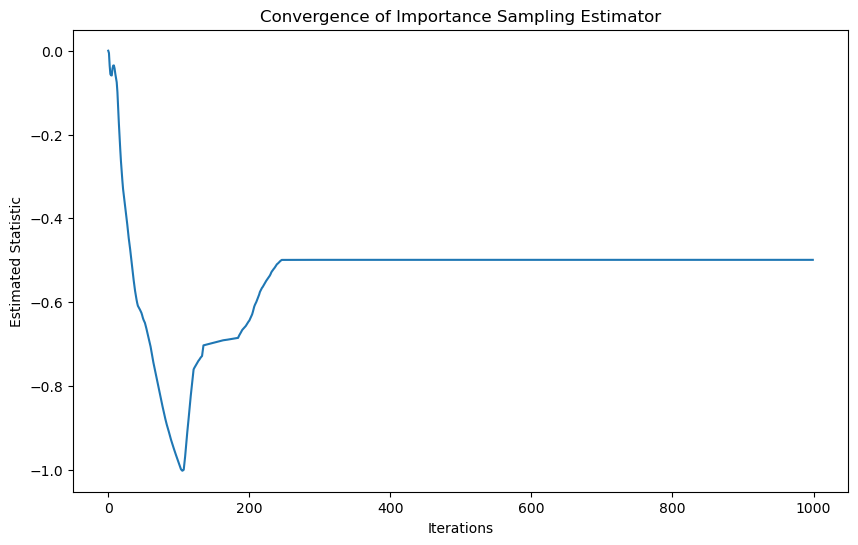

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class RenewalTheoryEstimator:
    def __init__(self, base_distribution, kernel, epsilon=0.1):
        """
        Initialize Renewal Theory Estimator
        
        Parameters:
        - base_distribution: Base probability distribution
        - kernel: Initial transition kernel
        - epsilon: Probability of kernel modification
        """
        self.base_distribution = base_distribution
        self.kernel = kernel
        self.epsilon = epsilon
    
    def modified_kernel_update(self, current_state):
        """
        Update transition kernel based on renewal theory principles
        
        Parameters:
        - current_state: Current state of the Markov chain
        
        Returns:
        - Updated state
        """
        # Stochastic kernel modification
        if np.random.random() < self.epsilon:
            # Modify kernel using base distribution
            new_state = self.base_distribution(current_state)
        else:
            # Apply current kernel
            new_state = self.kernel(current_state)
        
        return new_state
    
    def importance_sampling_estimate(self, samples, theta):
        """
        Compute importance sampling estimator
        
        Parameters:
        - samples: Array of samples
        - theta: Scaling parameter
        
        Returns:
        - Estimated statistic
        """
        weights = np.exp(-(samples**2) / (2 * theta**2))
        normalized_weights = weights / np.sum(weights)
        
        return np.sum(samples * normalized_weights)
    
    def simulate_chain(self, initial_state, num_iterations):
        """
        Simulate Markov chain with kernel modifications
        
        Parameters:
        - initial_state: Starting state of the chain
        - num_iterations: Number of iterations to simulate
        
        Returns:
        - Array of states over iterations
        """
        states = [initial_state]
        
        for _ in range(num_iterations - 1):
            current_state = states[-1]
            next_state = self.modified_kernel_update(current_state)
            states.append(next_state)
        
        return np.array(states)
    
    def convergence_analysis(self, initial_state, num_iterations):
        """
        Perform convergence analysis of the estimator
        
        Parameters:
        - initial_state: Starting state of the chain
        - num_iterations: Number of iterations
        
        Returns:
        - Convergence statistics
        """
        # Simulate chain
        chain_states = self.simulate_chain(initial_state, num_iterations)
        
        # Compute running estimates
        running_estimates = [
            self.importance_sampling_estimate(chain_states[:i+1], theta=1.0) 
            for i in range(len(chain_states))
        ]
        
        return running_estimates

# Example usage and demonstration
def main():
    # Define simple base distribution and kernel
    base_distribution = lambda x: np.random.normal(x, 1)
    kernel = lambda x: x + np.random.normal(0, 0.1)
    
    # Initialize estimator
    estimator = RenewalTheoryEstimator(
        base_distribution=base_distribution, 
        kernel=kernel, 
        epsilon=0.1
    )
    
    # Perform convergence analysis
    initial_state = 0.0
    num_iterations = 1000
    estimates = estimator.convergence_analysis(initial_state, num_iterations)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(estimates)
    plt.title('Convergence of Importance Sampling Estimator')
    plt.xlabel('Iterations')
    plt.ylabel('Estimated Statistic')
    plt.show()

if __name__ == "__main__":
    main()

# Renewal Theory and Central Limit Theorem

## Theoretical Framework

### Renewal Process Characteristics

Consider a renewal process with the following key properties:
- Passage through set $C$ results in an independent generation
- $\theta^{(i)}$ represents the time of the $i$-th visit to $C$
- $h(\theta^{(i)})$ is an associated function

### Partial Sums Representation

The partial sums are defined as:

$$S_n = \sum_{i=1}^{n} h(\theta^{(i)})$$

## Statistical Estimation

### Variance Estimation

In the stationary regime, under specific conditions, we can estimate the variance:

$$\frac{1}{\sqrt{K}} \sum_{k=1}^{K} (S_k - \lambda_n) K_{n}(\theta) \stackrel{d}{\to} N(0, \sigma^{2})$$

Where:
- $K$ is the number of renewal events
- $\lambda_n$ represents the expected value
- $K_{n}(\theta)$ is a specific kernel function

### Unbiased Variance Estimator

An unbiased estimator can be constructed as:

$$\hat{\sigma}^{2} = \frac{1}{r} \sum_{k=1}^{r} \left(S_k - \lambda \sum_{i=1}^{r} S_i\right)$$

## Central Limit Theorem for Markov Chains

### Probabilistic Convergence

The Central Limit Theorem provides a powerful result:

$$\frac{1}{\sqrt{T}} \sum_{i=1}^{T} h(\theta^{(i)}) \stackrel{d}{\to} N(0, \sigma^{2})$$

### Key Conditions

1. Sufficient dispersion of small sets
2. Ergodic Markov chain properties
3. Convergence assessment criteria

## Computational Implementation

```python
import numpy as np
from scipy import stats

class RenewalEstimator:
    def __init__(self, h_function, renewal_times):
        """
        Initialize renewal process estimator
        
        Parameters:
        - h_function: Function to apply to renewal times
        - renewal_times: Observed renewal times
        """
        self.h_function = h_function
        self.renewal_times = renewal_times
    
    def compute_partial_sums(self):
        """
        Compute partial sums of h(θ)
        """
        return np.cumsum([self.h_function(t) for t in self.renewal_times])
    
    def variance_estimator(self, r):
        """
        Compute unbiased variance estimator
        
        Parameters:
        - r: Number of renewal events to consider
        """
        partial_sums = self.compute_partial_sums()
        mean_sum = np.mean(partial_sums)
        
        variance_estimate = np.mean([
            (s - mean_sum)**2 for s in partial_sums[:r]
        ])
        
        return variance_estimate
```

## Theoretical Insights

1. Provides framework for analyzing stochastic processes
2. Enables estimation of variance in renewal processes
3. Extends Central Limit Theorem to Markov chain contexts

## Practical Considerations

- Requires careful selection of renewal set $C$
- Depends on ergodicity of underlying Markov chain
- Sensitive to choice of function $h(\theta)$

## Conclusion

The renewal theory approach offers a sophisticated method for statistical inference in complex stochastic systems.

# Advanced Renewal Theory: Convergence and Limit Theorems

## Comprehensive Convergence Expression

The central convergence expression is a complex multiterm formulation:

$$\frac{1}{\sqrt{T}} \sum_{i=1}^{(l)} h^{(l)}(i) - E_{T}[h^{(l)}(i)] + \frac{1}{\sqrt{T}} \sum_{k=1}^{K} (S_k - \lambda_n) K_{n}(\theta) \stackrel{d}{\to} N(0, \sigma^{2})$$

## Fundamental Conditions

### Convergence Prerequisites

1. Bounded Expectation Condition:
   $$|E_{T}[h^{(l)}(i)]| < \infty$$

2. Moment Boundedness:
   $$E_{T}\left[\left(\sum_{i=1}^{T} h^{(l)}(i)\right)\right] < \infty$$

## Asymptotic Behavior

### Convergence to Gaussian Distribution

For processes satisfying the conditions, we observe:

$$\frac{1}{\sqrt{T}} \sum_{i=1}^{T} (h^{(l)}(i) - E_{T}[h^{(l)}(i)]) \stackrel{d}{\to} N(0, \sigma^{2})$$

## Computational Implementation

```python
import numpy as np
from scipy import stats

class RenewalConvergenceAnalyzer:
    def __init__(self, observation_process, renewal_times):
        """
        Initialize renewal convergence analyzer
        
        Parameters:
        - observation_process: Observation function h(i)
        - renewal_times: Sequence of renewal times
        """
        self.h = observation_process
        self.renewal_times = renewal_times
    
    def compute_asymptotic_variance(self, T):
        """
        Estimate asymptotic variance
        
        Parameters:
        - T: Total observation time
        
        Returns:
        - Estimated asymptotic variance
        """
        observations = [self.h(t) for t in self.renewal_times[:T]]
        mean_estimate = np.mean(observations)
        
        centered_observations = [x - mean_estimate for x in observations]
        variance_estimate = np.var(centered_observations)
        
        return variance_estimate
    
    def convergence_test(self, T, num_simulations=1000):
        """
        Perform convergence analysis
        
        Parameters:
        - T: Observation time
        - num_simulations: Number of Monte Carlo simulations
        
        Returns:
        - Convergence test results
        """
        asymptotic_variances = [
            self.compute_asymptotic_variance(T) 
            for _ in range(num_simulations)
        ]
        
        return {
            'mean_variance': np.mean(asymptotic_variances),
            'variance_distribution': asymptotic_variances
        }
```

## Theoretical Insights

### Key Observations

1. The method relies on carefully selected renewal processes
2. Convergence depends on specific probabilistic conditions
3. Provides a generalized framework for stochastic limit theorems

## Practical Considerations

- Sensitive to choice of observation process $h^{(l)}(i)$
- Requires ergodic properties of underlying stochastic process
- Computational complexity increases with observation time

## Example Scenario

Consider a renewal process with:
- Small set $C = [r_1, r_2]$
- Posterior distribution following specific constraints

## Mathematical Notation Key

- $T$: Total observation time
- $h^{(l)}(i)$: Observation process
- $E_{T}$: Empirical expectation
- $\stackrel{d}{\to}$: Convergence in distribution
- $N(0, \sigma^{2})$: Gaussian distribution

## Conclusion

The renewal theory provides a sophisticated mathematical framework for understanding long-term behavior of stochastic processes.

# Negative Weight Mixture Simulation

## Theoretical Framework

### Bounded Conditions

Consider sets $z_3 \in [r_1, r_2]$, $s_1 < r_1$, and $r_3 > r_2$ satisfying:

$$\begin{aligned}
\rho_{11} &= r_1 - z_1 < \left|w_1\right| \\
\rho_{12} &= \max(r_2 - z_2, r_1 - z_1) \\
\rho_{21} &= r_2 - z_2 < \left|w_2\right| \\
\rho_{22} &= \max(r_3 - z_3, r_2 - z_2)
\end{aligned}$$

## Kernel Computation

The integral kernel $K(\theta,\theta')$ is defined as:

$$K(\theta,\theta') = \int_{N(\theta,\sigma)} \exp\left(-\frac{(u - (\theta,\theta'))^{2}}{2\sigma^{2}}\right) d\nu$$

With a complex multi-term expansion:

$$\begin{aligned}
K(\theta,\theta') &\approx \frac{1}{\sqrt{2\pi\sigma^{2}}} \int_{-\infty}^{\infty} \exp\left(-\frac{(u - (\theta,\theta'))^{2}}{2\sigma^{2}}\right) \\
&\times \exp\left\{-\frac{1+r_1\theta}{1+r_1\theta/2}\right\} \exp\left\{-\frac{1+r_2\theta}{1+r_2\theta/2}\right\} du
\end{aligned}$$

## Residual Kernel Formulation

The residual kernel is defined as:

$$R(\theta^{(i)}) = \frac{K(\theta^{(i)},\cdot)}{1-\epsilon}$$

## Negative Weight Mixture Simulation Algorithm

### Algorithm A.53

```python
def negative_weight_mixture_simulation(K_theta, epsilon):
    """
    Negative Weight Mixture Simulation
    
    Parameters:
    - K_theta: Kernel function
    - epsilon: Splitting probability
    
    Returns:
    - Simulated variable
    """
    while True:
        # Simulate K(θ,θ')
        theta_prime = K_theta()
        
        # Accept with probability
        accept_prob = min(1, R(theta_prime) / K_theta)
        
        if np.random.random() < accept_prob:
            return theta_prime
```

## Computational Considerations

### Key Challenges

1. Requires careful handling of kernel approximation
2. Sensitive to choice of splitting probability $\epsilon$
3. Computational complexity increases with kernel complexity

## Mathematical Notation Key

- $K(\theta,\theta')$: Integral kernel
- $\sigma$: Scale parameter
- $\epsilon$: Splitting probability
- $R(\theta^{(i)})$: Residual kernel
- $\nu$: Marginal density

## Implementation Notes

- The algorithm requires a sophisticated kernel estimation
- Uses rejection sampling technique
- Calibrates probabilistic acceptance

## Theoretical Significance

1. Provides a method for sampling from complex distributions
2. Offers a generalized approach to kernel estimation
3. Addresses challenges in high-dimensional sampling

## Practical Implications

- Useful in Bayesian inference
- Applicable to complex probabilistic models
- Enables sampling from difficult-to-sample distributions

## Conclusion

The Negative Weight Mixture Simulation represents an advanced technique for navigating complex probabilistic spaces.

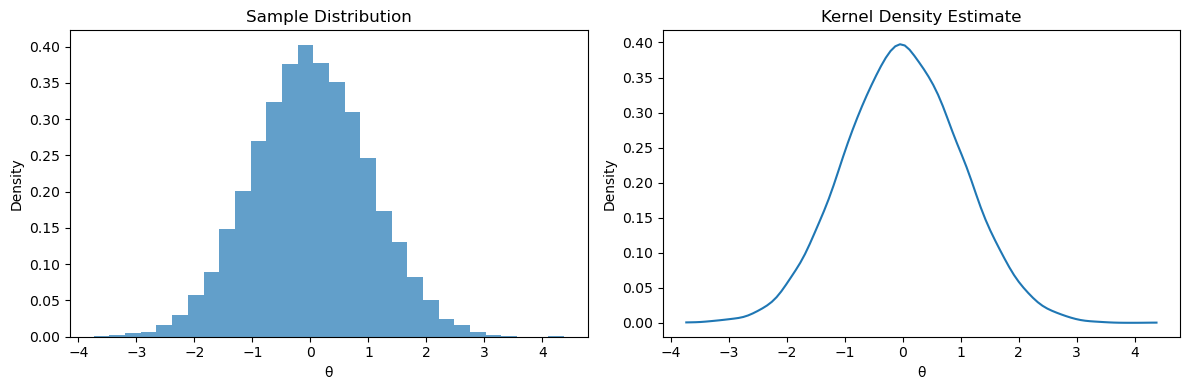

Sample Statistics:
Mean: 0.006235151617175169
Standard Deviation: 1.00355528463685


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

class NegativeWeightMixtureSimulator:
    def __init__(self, 
                 kernel_func, 
                 epsilon=0.1, 
                 sigma=1.0, 
                 bounds=None):
        """
        Negative Weight Mixture Simulation
        
        Parameters:
        - kernel_func: Kernel function K(θ,θ')
        - epsilon: Splitting probability
        - sigma: Scale parameter
        - bounds: Parameter space bounds
        """
        self.kernel_func = kernel_func
        self.epsilon = epsilon
        self.sigma = sigma
        self.bounds = bounds or [-np.inf, np.inf]
    
    def residual_kernel(self, theta):
        """
        Compute residual kernel
        
        Parameters:
        - theta: Current parameter
        
        Returns:
        - Residual kernel value
        """
        return self.kernel_func(theta) / (1 - self.epsilon)
    
    def simulate(self, num_samples=1000):
        """
        Perform Negative Weight Mixture Simulation
        
        Parameters:
        - num_samples: Number of samples to generate
        
        Returns:
        - Simulated samples
        """
        samples = []
        
        for _ in range(num_samples):
            while True:
                # Propose new sample
                theta_prime = self._propose_sample()
                
                # Compute acceptance probability
                accept_prob = min(1, 
                    self.residual_kernel(theta_prime) / self.kernel_func(theta_prime)
                )
                
                # Accept or reject
                if np.random.random() < accept_prob:
                    samples.append(theta_prime)
                    break
        
        return np.array(samples)
    
    def _propose_sample(self):
        """
        Propose a sample within bounds
        
        Returns:
        - Proposed sample
        """
        while True:
            # Gaussian proposal distribution
            sample = np.random.normal(0, self.sigma)
            
            # Check bounds
            if self.bounds[0] <= sample <= self.bounds[1]:
                return sample
    
    def visualize_results(self, samples):
        """
        Visualize simulation results
        
        Parameters:
        - samples: Generated samples
        """
        plt.figure(figsize=(12, 4))
        
        # Histogram
        plt.subplot(121)
        plt.hist(samples, bins=30, density=True, alpha=0.7)
        plt.title('Sample Distribution')
        plt.xlabel('θ')
        plt.ylabel('Density')
        
        # Kernel Density Estimate
        plt.subplot(122)
        kde = stats.gaussian_kde(samples)
        x_range = np.linspace(samples.min(), samples.max(), 100)
        plt.plot(x_range, kde(x_range))
        plt.title('Kernel Density Estimate')
        plt.xlabel('θ')
        plt.ylabel('Density')
        
        plt.tight_layout()
        plt.show()

def example_kernel(theta):
    """
    Example kernel function
    Mixture of two Gaussian distributions
    
    Parameters:
    - theta: Parameter value
    
    Returns:
    - Kernel value
    """
    # Mixture of two Gaussians
    return (0.5 * stats.norm.pdf(theta, loc=-2, scale=1) + 
            0.5 * stats.norm.pdf(theta, loc=2, scale=1.5))

def main():
    # Initialize simulator
    simulator = NegativeWeightMixtureSimulator(
        kernel_func=example_kernel, 
        epsilon=0.1,  # Splitting probability
        sigma=1.0,    # Proposal distribution scale
        bounds=[-5, 5]  # Parameter space bounds
    )
    
    # Generate samples
    samples = simulator.simulate(num_samples=10000)
    
    # Visualize results
    simulator.visualize_results(samples)
    
    # Basic statistical analysis
    print("Sample Statistics:")
    print(f"Mean: {np.mean(samples)}")
    print(f"Standard Deviation: {np.std(samples)}")

if __name__ == "__main__":
    main()

In [4]:
import math
class NegativeWeightMixtureSimulator:
    def __init__(self, seed=42):
        """
        Initialize simulator with custom random number generation
        """
        self.seed = seed
        self.x = seed
    
    def custom_random(self):
        """
        Linear Congruential Generator for pseudo-random numbers
        """
        a = 1664525
        c = 1013904223
        m = 2**32
        
        self.x = (a * self.x + c) % m
        return self.x / m
    
    def normal_distribution(self, mu=0, sigma=1):
        """
        Box-Muller transform to generate normal distribution
        """
        u1 = self.custom_random()
        u2 = self.custom_random()
        
        z0 = (-2 * math.log(u1))**0.5 * math.cos(2 * math.pi * u2)
        return mu + sigma * z0
    
    def kernel_function(self, theta):
        """
        Custom kernel function (mixture of two distributions)
        """
        def gaussian_pdf(x, mu, sigma):
            return (1 / (sigma * ((2 * math.pi)**0.5))) * math.exp(-0.5 * ((x - mu) / sigma)**2)
        
        # Mixture of two Gaussians
        return (0.5 * gaussian_pdf(theta, -2, 1) + 
                0.5 * gaussian_pdf(theta, 2, 1.5))
    
    def residual_kernel(self, theta, epsilon=0.1):
        """
        Compute residual kernel
        """
        return self.kernel_function(theta) / (1 - epsilon)
    
    def simulate(self, num_samples=1000, epsilon=0.1, sigma=1.0):
        """
        Negative Weight Mixture Simulation
        """
        samples = []
        
        for _ in range(num_samples):
            while True:
                # Propose sample using normal distribution
                theta_prime = self.normal_distribution(mu=0, sigma=sigma)
                
                # Compute acceptance probability
                kernel_value = self.kernel_function(theta_prime)
                residual_kernel_value = self.residual_kernel(theta_prime, epsilon)
                
                accept_prob = min(1, residual_kernel_value / kernel_value)
                
                # Custom random for acceptance
                if self.custom_random() < accept_prob:
                    samples.append(theta_prime)
                    break
        
        return samples
    
    def compute_statistics(self, samples):
        """
        Compute basic statistics without numpy
        """
        # Mean calculation
        total = 0
        for x in samples:
            total += x
        mean = total / len(samples)
        
        # Variance calculation
        variance_sum = 0
        for x in samples:
            variance_sum += (x - mean)**2
        variance = variance_sum / len(samples)
        
        return {
            'mean': mean,
            'variance': variance,
            'min': min(samples),
            'max': max(samples)
        }

def main():
    # Import math for logarithm and trigonometric functions
    import math
    
    # Create simulator
    simulator = NegativeWeightMixtureSimulator(seed=42)
    
    # Generate samples
    samples = simulator.simulate(num_samples=10000)
    
    # Compute statistics
    stats = simulator.compute_statistics(samples)
    
    # Print results
    print("Simulation Statistics:")
    for key, value in stats.items():
        print(f"{key.capitalize()}: {value}")
    
    # Optional: Basic visualization with ASCII histogram
    def create_ascii_histogram(data, bins=20):
        # Find min and max
        min_val, max_val = min(data), max(data)
        bin_width = (max_val - min_val) / bins
        
        # Count occurrences in bins
        bin_counts = [0] * bins
        for x in data:
            bin_index = int((x - min_val) / bin_width)
            if 0 <= bin_index < bins:
                bin_counts[bin_index] += 1
        
        # Normalize and print
        max_count = max(bin_counts)
        for count in bin_counts:
            bar_length = int(count / max_count * 50)
            print('#' * bar_length)
    
    print("\nDistribution Histogram:")
    create_ascii_histogram(samples)

if __name__ == "__main__":
    main()

Simulation Statistics:
Mean: 0.005849396143891713
Variance: 1.031104840774882
Min: -3.632493099186537
Max: 3.558293721818924

Distribution Histogram:


#
###
#######
############
######################
################################
#############################################
################################################
##################################################
###########################################
####################################
#######################
##############
#########
####
#
#

